In [ ]:
import pandas as pd

keys = [
    "policy_gradient_loss",
    "value_loss",
    "loss",
    "entropy_loss",
    "total_timesteps",
    "ep_rew_mean"
]

rows = []

current_row = {key: None for key in keys}

file_path = 'Chess_PPO_logs/logs.txt'  
with open(file_path, 'r') as file:
    for line in file:
        for key in keys:
            if key in line:
                try:
                    value = float(line.split('|')[2].strip())
                    current_row[key] = value
                except (IndexError, ValueError):
                    current_row[key] = None

        if all(current_row[key] is not None for key in keys):
            rows.append(current_row.copy())
            current_row = {key: None for key in keys}

structured_data = pd.DataFrame(rows)

In [7]:
structured_data

,policy_gradient_loss,value_loss,loss,entropy_loss,total_timesteps,ep_rew_mean
0,-0.01200,12.000000,12.000000,-8.3100,4096.0,-10.00
1,-0.01890,0.000103,0.000103,-8.2900,6144.0,-10.00
2,-0.01420,0.000073,0.000073,-8.2800,8192.0,-10.00
3,-0.02580,0.000145,0.000145,-8.2300,10240.0,-10.00
4,-0.02000,0.000099,0.000099,-8.1900,12288.0,-10.00
5,-0.02800,0.000184,0.000184,-8.0600,14336.0,-10.00
6,-0.03120,0.000169,0.000169,-8.0400,16384.0,-10.00
7,-0.04850,0.000277,0.000277,-7.8800,18432.0,-10.00
8,-0.05540,0.000328,0.000328,-7.4500,20480.0,-10.00
9,-0.05970,0.000430,0.000430,-7.1300,22528.0,-10.00


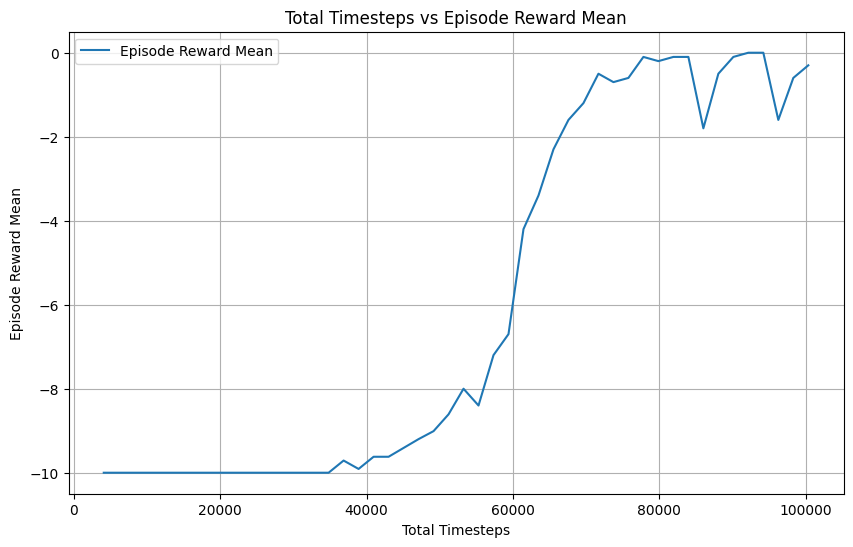

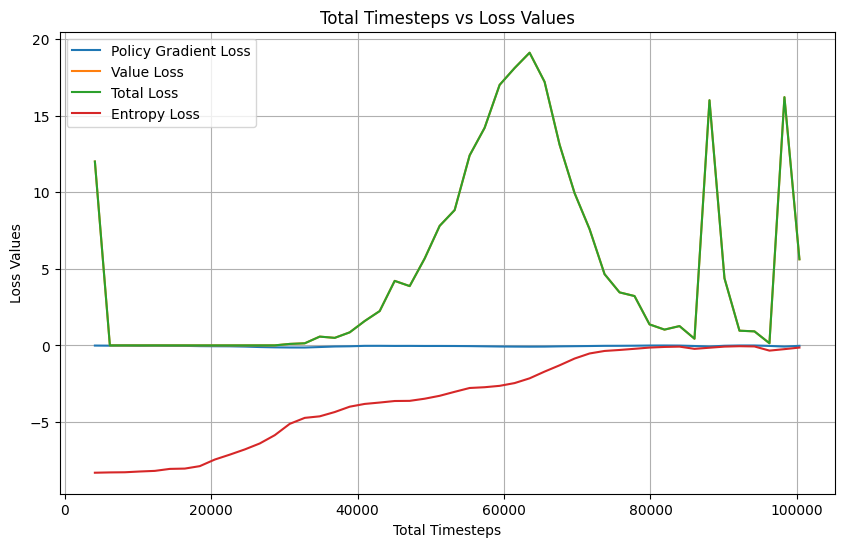

In [8]:
import matplotlib.pyplot as plt

# Plot 1: Total Timesteps vs Episode Reward Mean
plt.figure(figsize=(10, 6))
plt.plot(structured_data['total_timesteps'], structured_data['ep_rew_mean'], label="Episode Reward Mean")
plt.title("Total Timesteps vs Episode Reward Mean")
plt.xlabel("Total Timesteps")
plt.ylabel("Episode Reward Mean")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Total Timesteps vs Loss Values
plt.figure(figsize=(10, 6))
plt.plot(structured_data['total_timesteps'], structured_data['policy_gradient_loss'], label="Policy Gradient Loss")
plt.plot(structured_data['total_timesteps'], structured_data['value_loss'], label="Value Loss")
plt.plot(structured_data['total_timesteps'], structured_data['loss'], label="Total Loss")
plt.plot(structured_data['total_timesteps'], structured_data['entropy_loss'], label="Entropy Loss")

plt.title("Total Timesteps vs Loss Values")
plt.xlabel("Total Timesteps")
plt.ylabel("Loss Values")
plt.legend()
plt.grid(True)
plt.show()
